In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chisquare,chi2
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro, ks_2samp, anderson
from scipy.stats import ranksums
from scipy.stats import kruskal

In [ ]:
#read the dataset
data = pd.read_csv('Loan Approval.csv')

In [ ]:
# Determine the missing values in the DataFrame
missing_values = data.isnull()

# Count the number of missing values in each column
missing_counts = missing_values.sum()

# Calculate the total number of missing values in the DataFrame
total_missing = missing_counts.sum()

# Calculate the number of rows and columns in the DataFrame
num_rows, num_cols = data.shape

# Calculate the degrees of freedom for the chi-square test
df = 2 * num_cols

# Calculate the critical value for the chi-square test
critical_value = chi2.ppf(0.95, df)

# Calculate the test statistic for the chi-square test
test_statistic = (total_missing - (num_rows * num_cols / 2)) / np.sqrt(num_rows * num_cols * (num_rows + num_cols + 2) / 12)

# Perform the MCAR test
if test_statistic > critical_value:
    print("The data is not missing completely at random (MCAR).")
else:
    print("The data is missing completely at random (MCAR).")

The data is missing completely at random (MCAR).


In [ ]:
#make a copy
df= data.copy()

In [ ]:
#check the Independence of The observations or data points
d=df.drop('Loan_ID',axis=1)
d[d.duplicated()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
#display the first 5 rows of dataset
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# ANALYZING THE TYPES OF VARIABLES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# ANALYZING SOME MEASURES OF NUMIRCAL VARIABLES
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#display the missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Display the count in each category in Gender COL
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
#Fill the missing value withe New Category(Unknown)
df.Gender.fillna('Unknown', inplace=True)
df.Gender.value_counts()

Male       489
Female     112
Unknown     13
Name: Gender, dtype: int64

In [ ]:
#Display the count in each category in Married COL
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
#Fill the missing value withe New Category(Unknown)
df.Married.fillna('Unknown', inplace=True)
df.Married.value_counts()

Yes        398
No         213
Unknown      3
Name: Married, dtype: int64

In [ ]:
#Display the count in each category in Dependents COL
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
#Fill the missing value withe New Category(-1)
df.Dependents.fillna('-1', inplace=True)
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
-1     15
Name: Dependents, dtype: int64

In [ ]:
#Display the count in each category in Self_Employed COL
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
#Fill the missing value withe New Category(Unknown)
df.Self_Employed.fillna('unknown', inplace=True)
df.Self_Employed.value_counts()

No         500
Yes         82
unknown     32
Name: Self_Employed, dtype: int64

In [ ]:
#Display the count in each category in Credit History COL
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
#Fill the missing value withe New Category(-1)
df.Credit_History.fillna(-1, inplace=True)
df.Credit_History.value_counts()

 1.0    475
 0.0     89
-1.0     50
Name: Credit_History, dtype: int64

# Analysis of Loan Amount column

In [ ]:
#Display the value counts in LoanAmount COL
df.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

# Loan Amount Distribution: Analyze the distribution of loan amounts by calculating descriptive statistics such as mean, median,and standard deviation.This can help identify the range of loan amounts and the most common loan amount requested by customers.

In [ ]:
# calculate descriptive statistics for LoanAmount
loan_amount_mean = df['LoanAmount'].mean()
loan_amount_median = df['LoanAmount'].median()
loan_amount_std = df['LoanAmount'].std()

# print the results
print(f"Loan Amount Mean: {loan_amount_mean:.2f}")
print(f"Loan Amount Median: {loan_amount_median:.2f}")
print(f"Loan Amount Standard Deviation: {loan_amount_std:.2f}")

Loan Amount Mean: 146.41
Loan Amount Median: 128.00
Loan Amount Standard Deviation: 85.59


<Axes: xlabel='LoanAmount', ylabel='Density'>

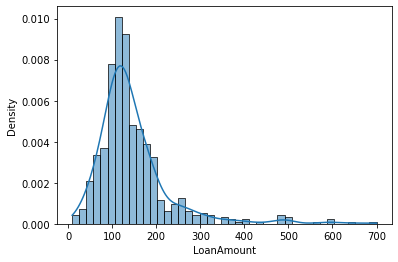

In [ ]:
#Histogram of the 'LoanAmount' ,help us understand the distribution and range of loan amounts in our dataset
sns.histplot(df['LoanAmount'],kde=True,stat='density')

In [ ]:
# Drop rows containing missing values in the LoanAmount column
df.dropna(subset=['LoanAmount'], inplace=True)

In [ ]:
#Take log of LoanAmount in new Column to Check normality
df[['LoanAmount_log']]=np.log(df[['LoanAmount']])

<Axes: xlabel='LoanAmount_log', ylabel='Density'>

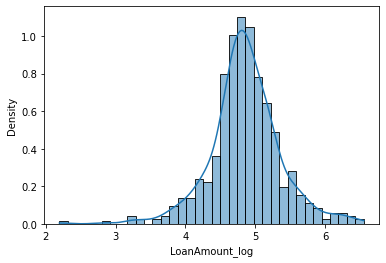

In [ ]:
#Histogram of the 'LoanAmount' ,help us understand the distribution and range of loan amounts in our dataset
sns.histplot(df['LoanAmount_log'],kde=True,stat='density')

In [ ]:
#Check normality of LoanAmount with Shapiro-Wilk
shapiro_LoanAmount= shapiro(df['LoanAmount_log'])
print('Shapiro-Wilk test results:')
print('LoanAmount:', shapiro_LoanAmount)

Shapiro-Wilk test results:
LoanAmount: ShapiroResult(statistic=0.9632991552352905, pvalue=5.3587211057415374e-11)


Because the (p-value <0.05) very small that mean the loan Amount NOT Normally Distributed

In [ ]:
#Display The LoanAmount
df['LoanAmount']

1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 592, dtype: float64

<Axes: xlabel='LoanAmount'>

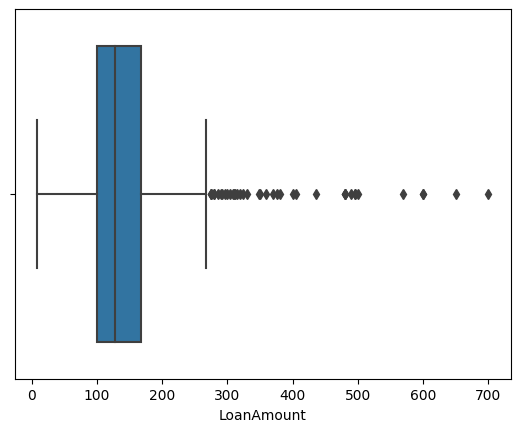

In [ ]:
# a box plot of the 'LoanAmount', identify the range and distribution of the loan amounts
sns.boxplot(data=df, x='LoanAmount')

# 1-Is there a relationship between marital status (Married) and loan Amount?

In [ ]:
# Subset the dataset into two groups based on 'Married'
married_LoanAmount = df[df['Married'] == 'Yes']['LoanAmount']
not_married_LoanAmount = df[df['Married'] == 'No']['LoanAmount']

Levene's test results: statistic=2.27, p-value=0.13


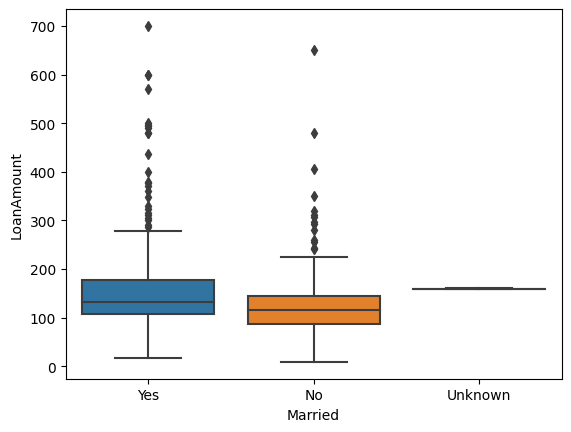

In [ ]:
# Check homogeneity of variance using box plots and Levene's test
sns.boxplot(x='Married', y='LoanAmount', data=df)
statistic, p_value = stats.levene(married_LoanAmount, not_married_LoanAmount)
print(f"Levene's test results: statistic={statistic:.2f}, p-value={p_value:.2f}")

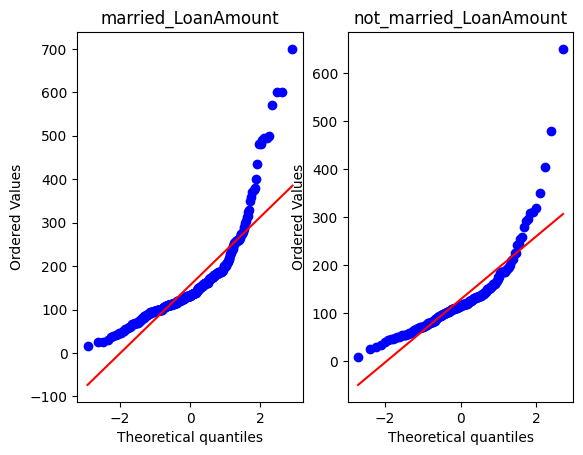

In [ ]:
# Check normality assumption using Q-Q plots
fig, ax = plt.subplots(1, 2)
stats.probplot(married_LoanAmount, plot=ax[0])
stats.probplot(not_married_LoanAmount, plot=ax[1])

ax[0].set_title('married_LoanAmount')
ax[1].set_title('not_married_LoanAmount')
plt.show()

In [ ]:
# Check normality assumption using Shapiro-Wilk test
shapiro_married = shapiro(married_LoanAmount)
shapiro_unmarried = shapiro(not_married_LoanAmount)

# Print the results
print('Shapiro-Wilk test results:')
print('Married:', shapiro_married)
print('Unmarried:', shapiro_unmarried)

Shapiro-Wilk test results:
Married: ShapiroResult(statistic=0.7632633447647095, pvalue=4.037573759739874e-23)
Unmarried: ShapiroResult(statistic=0.7731778025627136, pvalue=1.4900953315516408e-16)


After doing some tests to check the homogeneity of variance and normality ,see the assumptions of T test or Anova test not materialized . So we will Use nonparametric tests :

In [ ]:
# Use Wilcoxon rank-sum test to compare "LoanAmount" between married and unmarried applicants
married = df[df['Married'] == 'Yes']['LoanAmount']
unmarried = df[df['Married'] == 'No']['LoanAmount']

wilcoxon_test = ranksums(married, unmarried)
print('Wilcoxon rank-sum test results:')
print('p-value:', wilcoxon_test.pvalue)
if wilcoxon_test.pvalue < 0.05:
     print("There is a significant difference in LoanAmount based on Married.")
else:
    print("There is no significant difference in LoanAmount based on Married.")

Wilcoxon rank-sum test results:
p-value: 2.613535239793053e-06
There is a significant difference in LoanAmount based on Married.


In [ ]:
# Calculate the means
mean_married = df[df["Married"] == "Yes"]["LoanAmount"].mean()
mean_not_married = df[df["Married"] == "No"]["LoanAmount"].mean()

# Print the means
print("Mean Loan Amount (Married):", mean_married)
print("Mean Loan Amount (Not Married):", mean_not_married)

if mean_married > mean_not_married:
    print("Married individuals tend to ask for bigger loans.")
else:
    print("Not married individuals tend to ask for bigger loans.")


Mean Loan Amount (Married): 155.75
Mean Loan Amount (Not Married): 128.88349514563106
Married individuals tend to ask for bigger loans.


what i got from above 2 notebookes?

The insights gained from these analyses suggest that marital status may be an important factor in predicting loan amount,with married individuals tending to request larger loans on average than not married individuals.This information could be useful for lenders in developing loan products tailored to specific demographic groups.

# 2-Is there a relationship between Property Area and loan Amount?

In [ ]:
# Subset the dataset into two groups based on 'Property_Area'
urban = df[df['Property_Area'] == 'Urban']['LoanAmount']
rural = df[df['Property_Area'] == 'Rural']['LoanAmount']
semiurban = df[df['Property_Area'] == 'Semiurban']['LoanAmount']

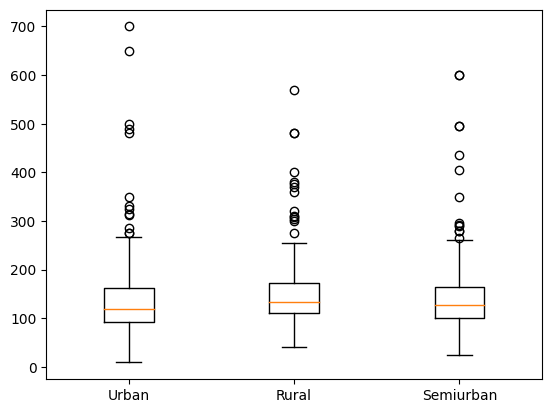

Levene's test results: statistic=0.69, p-value=0.50


In [ ]:
# Check homogeneity of variance using box plots and Levene's test
plt.boxplot([urban, rural, semiurban], labels=['Urban', 'Rural', 'Semiurban'])
plt.show()
statistic, p_value =stats.levene(urban, rural, semiurban)

print(f"Levene's test results: statistic={statistic:.2f}, p-value={p_value:.2f}")

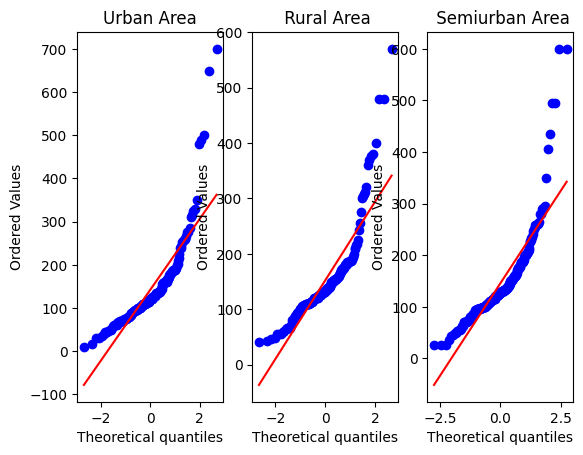

In [ ]:
# Check normality assumption using Q-Q plots
fig, ax = plt.subplots(1, 3)
stats.probplot(urban, plot=ax[0])
stats.probplot(rural, plot=ax[1])
stats.probplot(semiurban, plot=ax[2])
ax[0].set_title('Urban Area')
ax[1].set_title(' Rural Area')
ax[2].set_title(' Semiurban Area')
plt.show()

In [ ]:
# Check normality assumption using Shapiro-Wilk test
shapiro_urban = shapiro(urban)
shapiro_rural = shapiro(rural)
shapiro_semiurban = shapiro(semiurban)

# Print the results
print('Shapiro-Wilk test results:')
print('urba:', shapiro_urban)
print('rural:', shapiro_rural)
print('semiurban:', shapiro_semiurban)

Shapiro-Wilk test results:
urba: ShapiroResult(statistic=0.7450085878372192, pvalue=7.246864495617051e-17)
rural: ShapiroResult(statistic=0.7781550884246826, pvalue=6.5409959417697845e-15)
semiurban: ShapiroResult(statistic=0.7656499743461609, pvalue=9.746085168199863e-18)


After doing some tests to check the homogeneity of variance and normality ,see the assumptions of T test or Anova test not materialized . So we will Use nonparametric tests :

In [ ]:
# Use Kruskal-Wallis H test to compare "LoanAmount" between urban ,semiurban and rural applicants
urban = df[df['Property_Area'] == 'Urban']['LoanAmount']
rural = df[df['Property_Area'] == 'Rural']['LoanAmount']
semiurban = df[df['Property_Area'] == 'Semiurban']['LoanAmount']

kruskal_test = kruskal(urban, rural, semiurban)
print('Kruskal-Wallis H test results:')
print('p-value:', kruskal_test.pvalue)
if kruskal_test.pvalue < 0.05:
     print("There is a significant difference in LoanAmount based on Property_Area.")
else:
    print("There is no significant difference in LoanAmount based on Property_Area.")

Kruskal-Wallis H test results:
p-value: 0.027985627561837857
There is a significant difference in LoanAmount based on Property_Area.


# 3-Is there a relationship between Gender and Loan Amount?

In [ ]:
# Subset the dataset into two groups based on 'Gender'
male_LoanAmount =df[df["Gender"] == "Male"]["LoanAmount"]
female_LoanAmount = df[df["Gender"] == "Female"]["LoanAmount"]

Levene's test results: statistic=1.25, p-value=0.26


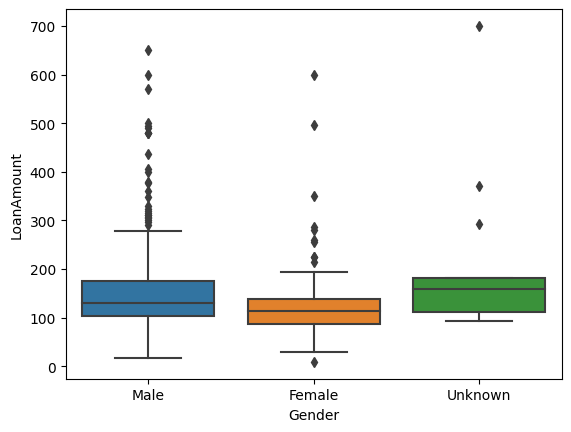

In [ ]:
# Check homogeneity of variance using box plots and Levene's test
sns.boxplot(x='Gender', y='LoanAmount', data=df)
statistic, p_value = stats.levene(male_LoanAmount, female_LoanAmount)
print(f"Levene's test results: statistic={statistic:.2f}, p-value={p_value:.2f}")


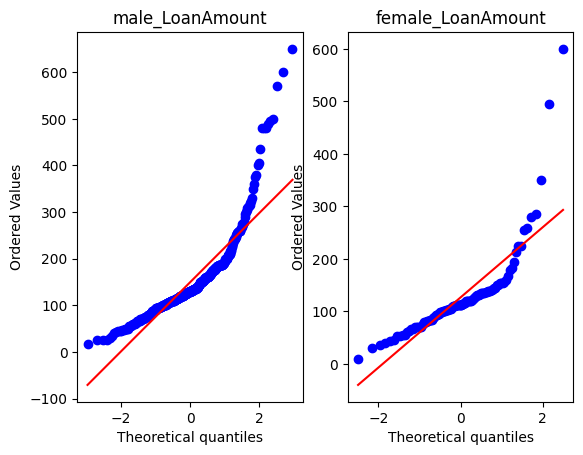

In [ ]:
# Check normality assumption using Q-Q plots
fig, ax = plt.subplots(1, 2)
stats.probplot(male_LoanAmount, plot=ax[0])
stats.probplot(female_LoanAmount, plot=ax[1])
ax[0].set_title('male_LoanAmount')
ax[1].set_title('female_LoanAmount')
plt.show()

In [ ]:
# Check normality assumption using Shapiro-Wilk test
shapiro_male = shapiro(male_LoanAmount)
shapiro_female = shapiro(female_LoanAmount)

# Print the results
print('Shapiro-Wilk test results:')
print('male:', shapiro_male)
print('female:', shapiro_female)

Shapiro-Wilk test results:
male: ShapiroResult(statistic=0.7942883968353271, pvalue=6.032201616615236e-24)
female: ShapiroResult(statistic=0.7047990560531616, pvalue=1.6881180969156168e-13)


After doing some tests to check the homogeneity of variance and normality ,see the assumptions of T test or Anova Test not materialized . So we will Use nonparametric tests :

In [ ]:
# Use Kruskal-Wallis H test to compare "LoanAmount" between urban ,semiurban and rural applicants
male_LoanAmount =df[df["Gender"] == "Male"]["LoanAmount"]
female_LoanAmount = df[df["Gender"] == "Female"]["LoanAmount"]

kruskal_test = kruskal(male_LoanAmount, female_LoanAmount)
print('Kruskal-Wallis H test results:')
print('p-value:', kruskal_test.pvalue)
if kruskal_test.pvalue < 0.05:
     print("There is a significant difference in LoanAmount based on Gender.")
else:
    print("There is no significant difference in LoanAmount based on Gender.")


Kruskal-Wallis H test results:
p-value: 0.00019857259465769244
There is a significant difference in LoanAmount based on Gender.


In [ ]:
# Calculate the means
mean_male = df[df["Gender"] == "Male"]["LoanAmount"].mean()
mean_female = df[df["Gender"] == "Female"]["LoanAmount"].mean()

# Print the means
print("Mean Loan Amount (Male):", mean_male)
print("Mean Loan Amount (Female):", mean_female)

if mean_male > mean_female:
    print("Males tend to ask for bigger loans.")
else:
    print("Females tend to ask for bigger loans.")


Mean Loan Amount (Male): 149.2659574468085
Mean Loan Amount (Female): 126.69724770642202
Males tend to ask for bigger loans.


what i got from above 2 notebookes?

The insights gained from these analyses suggest that gender may be an important factor in predicting loan amount, with males tending to request larger loans on average than females. This information could be useful for lenders in developing loan products tailored to specific demographic groups.

# 4-Is there a relationship between Self Employed and Loan Amount?

In [ ]:
# Subset the dataset into two groups based on 'Self_Employed'
LoanAmount_Self_Employed_Y = df[df['Self_Employed'] == 'Yes']['LoanAmount']
LoanAmount_Self_Employed_N = df[df['Self_Employed'] == 'No']['LoanAmount']

Levene's test results: statistic=4.64, p-value=0.03


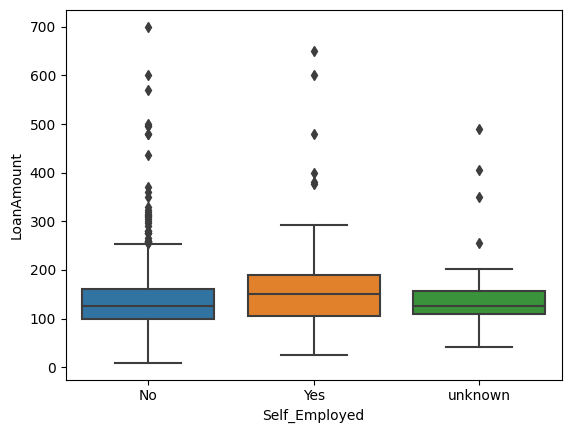

In [ ]:
# Check homogeneity of variance using box plots and Levene's test
sns.boxplot(x='Self_Employed', y='LoanAmount', data=df)
statistic, p_value = stats.levene(LoanAmount_Self_Employed_Y,LoanAmount_Self_Employed_N)
print(f"Levene's test results: statistic={statistic:.2f}, p-value={p_value:.2f}")

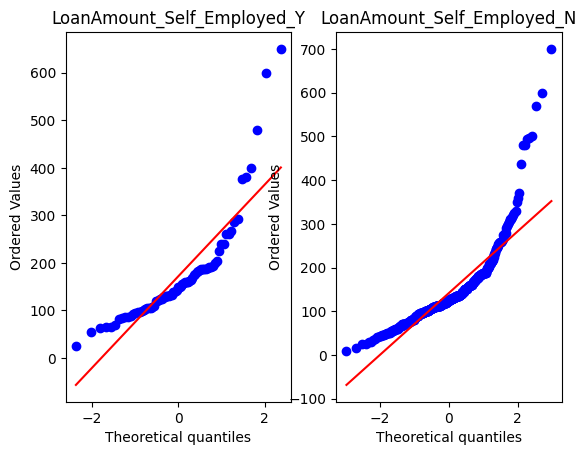

In [ ]:
# Check normality assumption using Q-Q plots
fig, ax = plt.subplots(1, 2)
stats.probplot(LoanAmount_Self_Employed_Y, plot=ax[0])
stats.probplot(LoanAmount_Self_Employed_N, plot=ax[1])

ax[0].set_title('LoanAmount_Self_Employed_Y')
ax[1].set_title('LoanAmount_Self_Employed_N')
plt.show()

In [ ]:
# Check normality assumption using Shapiro-Wilk test
shapiro_SELF_Y = shapiro(LoanAmount_Self_Employed_Y)
shapiro_SELF_N = shapiro(LoanAmount_Self_Employed_N)

# Print the results
print('Shapiro-Wilk test results:')
print('LoanAmount_Self_Employed_Y:', shapiro_SELF_Y)
print('LoanAmount_Self_Employed_N:', shapiro_SELF_N)

Shapiro-Wilk test results:
LoanAmount_Self_Employed_Y: ShapiroResult(statistic=0.765272855758667, pvalue=6.665628604629603e-10)
LoanAmount_Self_Employed_N: ShapiroResult(statistic=0.7786611318588257, pvalue=5.080617737916468e-25)


After doing some tests to check the homogeneity of variance and normality ,see the assumptions of T test or Anova Test not materialized . So we will Use nonparametric tests :

In [ ]:
# Use Kruskal-Wallis H test to compare relation between LoanAmount and Self_Employed
self_employed_loan = df[df["Self_Employed"] == "Yes"]["LoanAmount"]
not_self_employed_loan = df[df["Self_Employed"] == "No"]["LoanAmount"]

kruskal_test = kruskal(self_employed_loan, not_self_employed_loan)
print('Kruskal-Wallis H test results:')
print('p-value:', kruskal_test.pvalue)
if kruskal_test.pvalue < 0.05:
     print("There is a significant difference in LoanAmount based on Self_Employed.")
else:
    print("There is no significant difference in LoanAmount based on Self_Employed.")



Kruskal-Wallis H test results:
p-value: 0.00563550929667696
There is a significant difference in LoanAmount based on Self_Employed.


In [ ]:
# Calculate the means
mean_self_employed = self_employed_loan.mean()
mean_not_self_employed = not_self_employed_loan.mean()

# Print the means
print("Mean Loan Amount (Self Employed):", mean_self_employed)
print("Mean Loan Amount (Not Self Employed):", mean_not_self_employed)

if mean_self_employed > mean_not_self_employed:
    print("Self-employed individuals tend to ask for bigger loans.")
else:
    print("Non-self-employed individuals tend to ask for bigger loans.")


Mean Loan Amount (Self Employed): 172.0
Mean Loan Amount (Not Self Employed): 141.74896265560167
Self-employed individuals tend to ask for bigger loans.


what i got from above 2 notebookes?

The insights gained from these analyses suggest that self-employment status may be an important factor in predicting loan amount, with self-employed individuals tending to request larger loans on average than not self-employed individuals. This information could be useful for lenders in developing loan products tailored to specific demographic groups.

# 5-Is there a relationship between Credit_History and Loan Amount?

In [ ]:
# Calculate loan amount statistics by credit history category
loan_amount_stats = df.groupby("Credit_History")["LoanAmount"].describe()

# Print loan amount statistics
print("Loan Amount Statistics by Credit History:")
print(loan_amount_stats)

Loan Amount Statistics by Credit History:
                count        mean         std   min    25%    50%    75%  \
Credit_History                                                             
-1.0             49.0  161.081633  107.622186  58.0   99.0  130.0  185.0   
 0.0             85.0  146.717647   85.164772  45.0  104.0  125.0  160.0   
 1.0            458.0  144.786026   83.051842   9.0  100.0  128.0  168.0   

                  max  
Credit_History         
-1.0            650.0  
 0.0            600.0  
 1.0            700.0  


In [ ]:
# Subset the dataset into two groups based on 'Credit_History'
LoanAmount_Credit_History1 = df[df['Credit_History'] == 1]['LoanAmount']
LoanAmount_Credit_History0 = df[df['Credit_History'] == 0]['LoanAmount']


Levene's test results: statistic=0.18, p-value=0.67


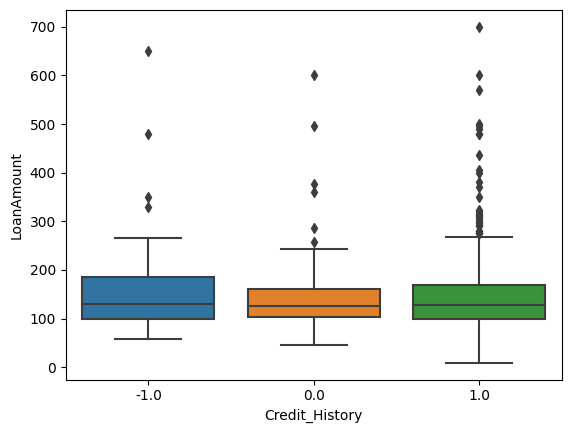

In [ ]:
# Check homogeneity of variance using box plots and Levene's test
sns.boxplot(x='Credit_History', y='LoanAmount', data=df)
statistic, p_value = stats.levene(LoanAmount_Credit_History1,LoanAmount_Credit_History0)
print(f"Levene's test results: statistic={statistic:.2f}, p-value={p_value:.2f}")

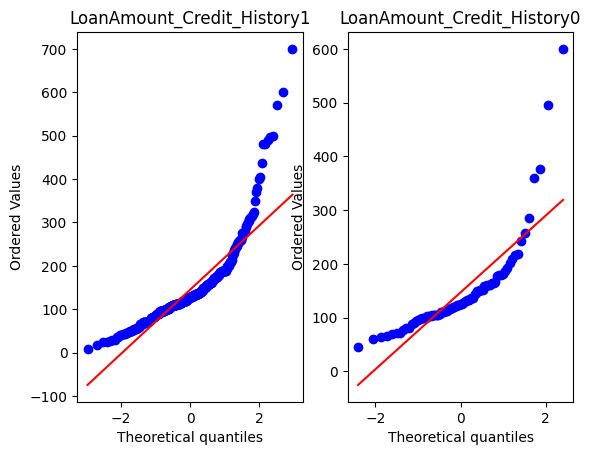

In [ ]:
# Check normality assumption using Q-Q plots
fig, ax = plt.subplots(1, 2)
stats.probplot(LoanAmount_Credit_History1, plot=ax[0])
stats.probplot(LoanAmount_Credit_History0, plot=ax[1])

ax[0].set_title('LoanAmount_Credit_History1')
ax[1].set_title('LoanAmount_Credit_History0')
plt.show()

In [ ]:
# Check normality assumption using Shapiro-Wilk test
shapiro_Credit1 = shapiro(LoanAmount_Credit_History1)
shapiro_Credit0 = shapiro(LoanAmount_Credit_History0)

# Print the results
print('Shapiro-Wilk test results:')
print('LoanAmount_Credit_History1:', shapiro_Credit1)
print('LoanAmount_Credit_History0:', shapiro_Credit0)

Shapiro-Wilk test results:
LoanAmount_Credit_History1: ShapiroResult(statistic=0.7890547513961792, pvalue=6.495111506686168e-24)
LoanAmount_Credit_History0: ShapiroResult(statistic=0.6965395212173462, pvalue=5.795500364336181e-12)


After doing some tests to check the homogeneity of variance and normality ,see the assumptions of T test or Anova test not materialized . So we will Use nonparametric tests :

In [ ]:
# Use Kruskal-Wallis H test to compare relation between LoanAmount and loan approval status
loan_amount_good_credit = df[df["Credit_History"] == 1]["LoanAmount"]
loan_amount_poor_credit = df[df["Credit_History"] == 0]["LoanAmount"]


kruskal_test = kruskal(loan_amount_good_credit, loan_amount_poor_credit )
print('Kruskal-Wallis H test results:')
print('p-value:', kruskal_test.pvalue)
if kruskal_test.pvalue < 0.05:
    print("There is a significant difference in loan amount between people with good credit history and poor credit history.")
else:
    print("There is no significant difference in loan amount between people with good credit history and poor credit history.")


Kruskal-Wallis H test results:
p-value: 0.9561742416364908
There is no significant difference in loan amount between people with good credit history and poor credit history.


# Loan Amount vs. Income: Analyze the relationship between loan amount and income by plotting a scatter plot and calculating the correlation coefficient.This can help identify if there is a positive or negative correlation between the two variables and how strong the relationship is.

The correlation coefficient between Income and LoanAmount is 0.57


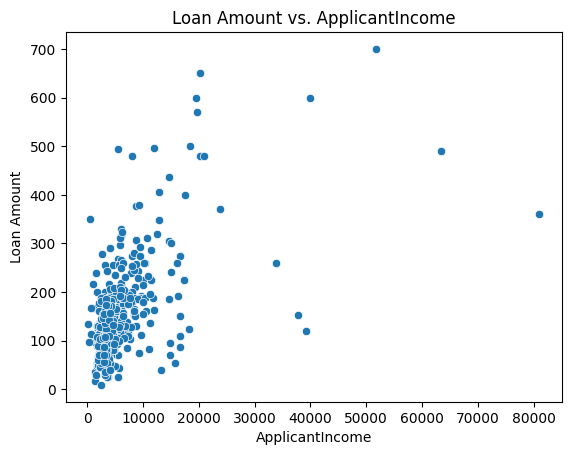

In [ ]:
# create a scatter plot of LoanAmount vs. ApplicantIncome
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)

# calculate the correlation coefficient between the two variables
corr_coef = np.corrcoef(df['ApplicantIncome'], df['LoanAmount'])[0,1]
print(f"The correlation coefficient between Income and LoanAmount is {corr_coef:.2f}")

# add a title and axis labels to the plot
plt.title('Loan Amount vs. ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan Amount')
plt.show()

what i got from this notebooke?

This analysis suggests that there is a moderate positive relationship between "ApplicantIncome" and "LoanAmount" .This means that as "ApplicantIncome" increases, "LoanAmount" tends to increase as well, although the relationship is not perfect. However, the correlation does not imply causation, and other variables may also be influencing the relationship between these two variables.

# Analysis of Loan Amount Term Column

In [ ]:
# calculate descriptive statistics for Loan_Amount_Term
loan_amount__term_mean = df['Loan_Amount_Term'].mean()
loan_amount_term_median = df['Loan_Amount_Term'].median()
loan_amount_term_std = df['Loan_Amount_Term'].std()

# print the results
print(f"Loan Amount Term Mean: {loan_amount__term_mean:.2f}")
print(f"Loan Amount Term Median: {loan_amount_term_median:.2f}")
print(f"Loan Amount Term Standard Deviation: {loan_amount_term_std:.2f}")

Loan Amount Term Mean: 342.15
Loan Amount Term Median: 360.00
Loan Amount Term Standard Deviation: 65.44


In [ ]:
df['Loan_Amount_Term'].value_counts()

360.0    493
180.0     42
480.0     15
300.0     13
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

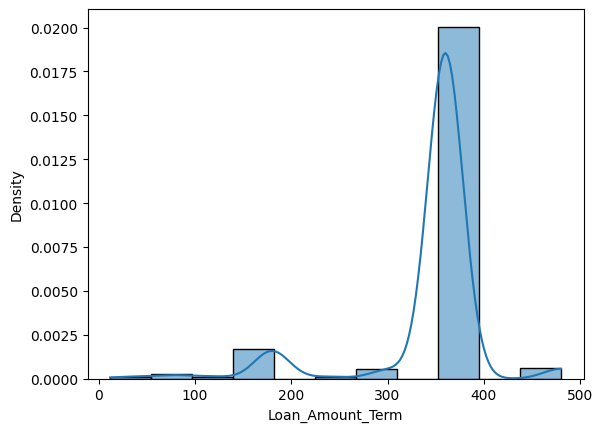

In [ ]:
#a histogram of the 'Loan_Amount_Term',provide valuable insights into the loan term and understand the distribution of loan term

sns.histplot(df['Loan_Amount_Term'],kde=True,stat='density')

In [ ]:
#Fill the missing value withe New Category (-1)
df.Loan_Amount_Term.fillna(-1, inplace=True)
df['Loan_Amount_Term'].value_counts()

 360.0    493
 180.0     42
 480.0     15
-1.0       14
 300.0     13
 84.0       4
 120.0      3
 240.0      3
 60.0       2
 36.0       2
 12.0       1
Name: Loan_Amount_Term, dtype: int64

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

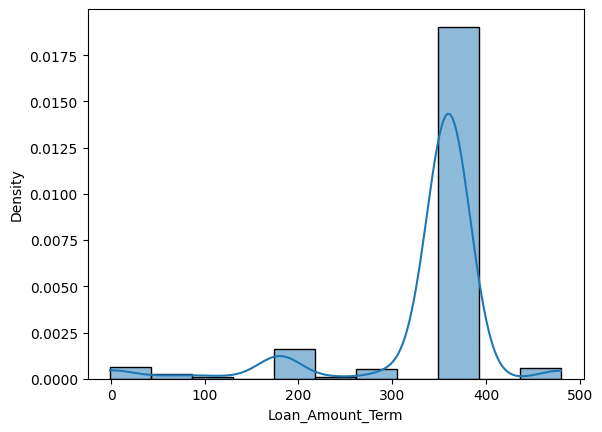

In [ ]:
#Histogram of the 'Loan_Amount_Term' ,help us understand the distribution and range of loan amounts in our dataset
sns.histplot(df['Loan_Amount_Term'],kde=True,stat='density')

# some Analysis between Loan Amount and Loan Amount Term

In [ ]:
# Select the relevant columns for the analysis
selected_columns = ["LoanAmount", "Loan_Amount_Term"]
data = df[selected_columns]

# Add a constant column for the intercept term
data = sm.add_constant(data)

# Perform linear regression
model = sm.OLS(data["Loan_Amount_Term"], data[["const", "LoanAmount"]])
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:       Loan_Amount_Term   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.512
Date:                Sat, 24 Jun 2023   Prob (F-statistic):              0.114
Time:                        21:23:23   Log-Likelihood:                -3454.9
No. Observations:                 592   AIC:                             6914.
Df Residuals:                     590   BIC:                             6923.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        324.7746      6.763     48.024      0.0

# Analysis of Loan Status column

# Loan Approval Rate: Calculate the loan approval rate. This can help identify how many loan applications were approved and how many were rejected.

In [ ]:
# Count the number of loan applications with Loan_Status = Y
approved_loans = (df['Loan_Status'] == 'Y').sum()

# Calculate the total number of loan applications
total_loans = len(df)

# Calculate the loan approval rate
approval_rate = approved_loans / total_loans

print(f'Loan approval rate: {approval_rate:.2%}')

Loan approval rate: 69.43%


# 1-Is there a relationship between Gender and loan approval status?

In [ ]:
#Testing relation between Gender and loan approval status
conti =pd.crosstab(df['Gender'],df['Loan_Status'])
h0='There is no relation between Gender and Loan Status'
h1='There is a relation between Gender and Loan Status'
c,p,dof,expected =chi2_contingency(conti)
if p < 0.05:
     print('P-value is {} so its less than  0.05 so we will  reject the null hypothesis'.format(p))
else:
     print('P-value is {} so its more than  0.05 so we will  accept the null hypothesis'.format(p))

P-value is 0.6612642000958269 so its more than  0.05 so we will  accept the null hypothesis


# 2-Is there a relationship between marital status and loan approval status?

In [ ]:
#Testing relation between marital status and loan approval status
conti =pd.crosstab(df['Married'],df['Loan_Status'])
h0='There is no relation between marital status and Loan Status'
h1='There is a relation between marital status and Loan Status'
c,p,dof,expected =chi2_contingency(conti)
if p < 0.05:
     print('P-value is {} so its less than  0.05 so we will  reject the null hypothesis'.format(p))
else:
     print('P-value is {} so its more than  0.05 so we will  accept the null hypothesis'.format(p))

P-value is 0.05559884465423805 so its more than  0.05 so we will  accept the null hypothesis


# 3-Is there a relationship between Dependents and loan approval status?

In [ ]:
#Testing relation between Dependents and loan approval status
conti =pd.crosstab(df['Dependents'],df['Loan_Status'])
h0='There is no relation between Dependents and Loan Status'
h1='There is a relation between Dependents and Loan Status'
c,p,dof,expected =chi2_contingency(conti)
if p < 0.05:
     print('P-value is {} so its less than  0.05 so we will  reject the null hypothesis'.format(p))
else:
     print('P-value is {} so its more than  0.05 so we will  accept the null hypothesis'.format(p))

P-value is 0.2718309195307134 so its more than  0.05 so we will  accept the null hypothesis


# 4-Is there a relationship between Educational background and loan approval status?

In [ ]:
#Testing relation between Educational background and loan approval status
conti =pd.crosstab(df['Education'],df['Loan_Status'])
h0='There is no relation between Education and Loan Status'
h1='There is a relation between Education and Loan Status'
c,p,dof,expected =chi2_contingency(conti)
if p < 0.05:
     print('P-value is {} so its less than  0.05 so we will  reject the null hypothesis'.format(p))
else:
     print('P-value is {} so its more than  0.05 so we will  accept the null hypothesis'.format(p))

P-value is 0.09552339599521484 so its more than  0.05 so we will  accept the null hypothesis


# 5-Is there a relationship between Self_Employed and loan approval status?

In [ ]:
#Testing relation between Self_Employed and loan approval status
conti =pd.crosstab(df['Self_Employed'],df['Loan_Status'])
h0='There is no relation between Self_Employed and Loan Status'
h1='There is a relation between Self_Employed and Loan Status'
c,p,dof,expected =chi2_contingency(conti)
if p < 0.05:
     print('P-value is {} so its less than  0.05 so we will  reject the null hypothesis'.format(p))
else:
     print('P-value is {} so its more than  0.05 so we will  accept the null hypothesis'.format(p))

P-value is 0.8275350094438361 so its more than  0.05 so we will  accept the null hypothesis


# 6-Is there a relationship between Credit_History and loan approval status?

In [ ]:
#Testing relation between Credit_History and loan approval status
conti =pd.crosstab(df['Credit_History'],df['Loan_Status'])
h0='There is no relation between Credit_History and Loan Status'
h1='There is a relation between Credit_History and Loan Status'
c,p,dof,expected =chi2_contingency(conti)
if p < 0.05:
     print('P-value is {} so its less than  0.05 so we will  reject the null hypothesis'.format(p))
else:
     print('P-value is {} so its more than  0.05 so we will  accept the null hypothesis'.format(p))

P-value is 7.699210872440221e-39 so its less than  0.05 so we will  reject the null hypothesis


# 7-Is there a relationship between Property_Area and loan approval status?

In [ ]:
#Testing relation between Property_Area and loan approval status
conti =pd.crosstab(df['Property_Area'],df['Loan_Status'])
h0='There is no relation between Property_Area and Loan Status'
h1='There is a relation between Property_Area and Loan Status'
c,p,dof,expected =chi2_contingency(conti)
if p < 0.05:
     print('P-value is {} so its less than  0.05 so we will  reject the null hypothesis'.format(p))
else:
     print('P-value is {} so its more than  0.05 so we will  accept the null hypothesis'.format(p))

P-value is 0.004591249445619521 so its less than  0.05 so we will  reject the null hypothesis


# 8-Is there a relationship between Loan_Amount_Term and loan approval status?

In [ ]:
#Testing relation between Loan_Amount_Term and loan approval status
conti =pd.crosstab(df['Loan_Amount_Term'],df['Loan_Status'])
h0='There is no relation between Loan_Amount_Term and Loan Status'
h1='There is a relation between Loan_Amount_Term and Loan Status'
c,p,dof,expected =chi2_contingency(conti)
if p < 0.05:
     print('P-value is {} so its less than  0.05 so we will  reject the null hypothesis'.format(p))
else:
     print('P-value is {} so its more than  0.05 so we will  accept the null hypothesis'.format(p))

P-value is 0.12550406861025312 so its more than  0.05 so we will  accept the null hypothesis


# 9-Is there a relationship between ApplicantIncome and loan approval status?

In [ ]:
# Subset the dataset into two groups based on 'ApplicantIncome'
ApplicantIncome_LoanST_Y = df[df['Loan_Status'] == 'Y']['ApplicantIncome']
ApplicantIncome_LoanST_N = df[df['Loan_Status'] == 'N']['ApplicantIncome']

Levene's test results: statistic=0.03, p-value=0.86


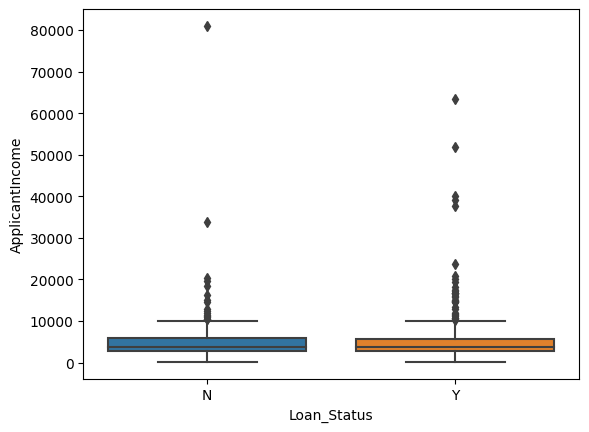

In [ ]:
# Check homogeneity of variance using box plots and Levene's test
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
statistic, p_value = stats.levene(ApplicantIncome_LoanST_Y,ApplicantIncome_LoanST_N)
print(f"Levene's test results: statistic={statistic:.2f}, p-value={p_value:.2f}")

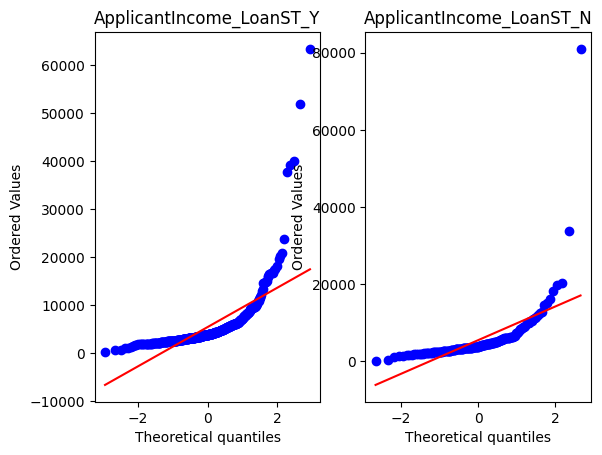

In [ ]:
# Check normality assumption using Q-Q plots
fig, ax = plt.subplots(1, 2)
stats.probplot(ApplicantIncome_LoanST_Y, plot=ax[0])
stats.probplot(ApplicantIncome_LoanST_N, plot=ax[1])

ax[0].set_title('ApplicantIncome_LoanST_Y')
ax[1].set_title('ApplicantIncome_LoanST_N')
plt.show()

In [ ]:
# Check normality assumption using Shapiro-Wilk test
shapiro_APP_Y = shapiro(ApplicantIncome_LoanST_Y)
shapiro_APP_N = shapiro(ApplicantIncome_LoanST_N)

# Print the results
print('Shapiro-Wilk test results:')
print('ApplicantIncome_LoanST_Y:', shapiro_APP_Y)
print('ApplicantIncome_LoanST_N:', shapiro_APP_N)

Shapiro-Wilk test results:
ApplicantIncome_LoanST_Y: ShapiroResult(statistic=0.5011630058288574, pvalue=2.3267526529929088e-32)
ApplicantIncome_LoanST_N: ShapiroResult(statistic=0.4035685062408447, pvalue=3.5121152462661494e-24)


After doing some tests to check the homogeneity of variance and normality ,see the assumptions of T test or Anova test not materialized . So we will Use nonparametric tests :

In [ ]:
# Use Kruskal-Wallis H test to compare relation between applicant's income and loan approval status
ApplicantIncome_LoanST_Y = df[df['Loan_Status'] == 'Y']['ApplicantIncome']
ApplicantIncome_LoanST_N = df[df['Loan_Status'] == 'N']['ApplicantIncome']

kruskal_test = kruskal(ApplicantIncome_LoanST_Y, ApplicantIncome_LoanST_N)
print('Kruskal-Wallis H test results:')
print('p-value:', kruskal_test.pvalue)
if kruskal_test.pvalue < 0.05:
     print("There is a significant difference in ApplicantIncome based on Loan_Status.")
else:
    print("There is no significant difference in ApplicantIncome based on Loan_Status.")

Kruskal-Wallis H test results:
p-value: 0.8660127928006394
There is no significant difference in ApplicantIncome based on Loan_Status.


# 10-Is there a relationship between CoapplicantIncome and loan approval status?

In [ ]:
# Subset the dataset into two groups based on 'Loan_Status'
CoapplicantIncome_LoanST_Y = df[df['Loan_Status'] == 'Y']['CoapplicantIncome']
CoapplicantIncome_LoanST_N = df[df['Loan_Status'] == 'N']['CoapplicantIncome']

Levene's test results: statistic=5.49, p-value=0.02


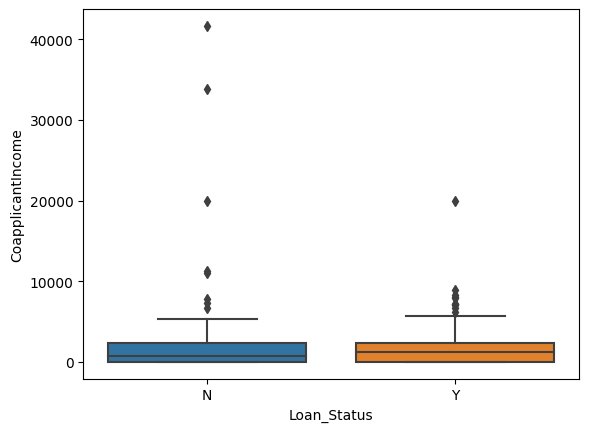

In [ ]:
# Check homogeneity of variance using box plots and Levene's test
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df)
statistic, p_value = stats.levene(CoapplicantIncome_LoanST_Y,CoapplicantIncome_LoanST_N)
print(f"Levene's test results: statistic={statistic:.2f}, p-value={p_value:.2f}")

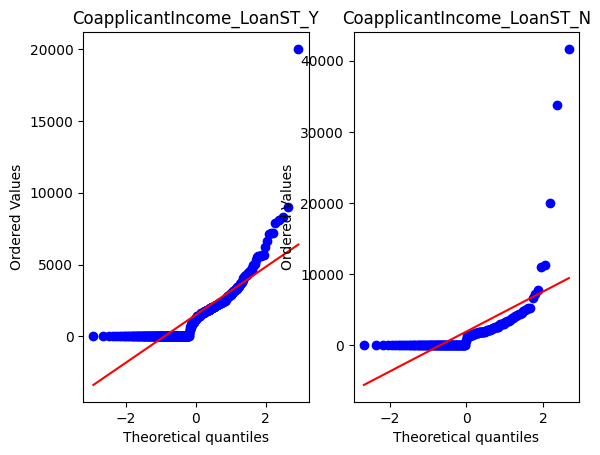

In [ ]:
# Check normality assumption using Q-Q plots
fig, ax = plt.subplots(1, 2)
stats.probplot(CoapplicantIncome_LoanST_Y, plot=ax[0])
stats.probplot(CoapplicantIncome_LoanST_N, plot=ax[1])

ax[0].set_title('CoapplicantIncome_LoanST_Y')
ax[1].set_title('CoapplicantIncome_LoanST_N')
plt.show()

In [ ]:
# Check normality assumption using Shapiro-Wilk test
shapiro_COAPP_Y = shapiro(CoapplicantIncome_LoanST_Y)
shapiro_COAPP_N = shapiro(CoapplicantIncome_LoanST_N)

# Print the results
print('Shapiro-Wilk test results:')
print('CoapplicantIncome_LoanST_Y:', shapiro_COAPP_Y)
print('CoapplicantIncome_LoanST_N:', shapiro_COAPP_N)

Shapiro-Wilk test results:
CoapplicantIncome_LoanST_Y: ShapiroResult(statistic=0.735267162322998, pvalue=4.530706745191427e-25)
CoapplicantIncome_LoanST_N: ShapiroResult(statistic=0.3960537910461426, pvalue=2.62269745259571e-24)


After doing some tests to check the homogeneity of variance and normality ,see the assumptions of T test or Anova test not materialized . So we will Use nonparametric tests :

In [ ]:
# Use Kruskal-Wallis H test to compare relation between coapplicant's income and loan approval status
CoapplicantIncome_LoanST_Y = df[df['Loan_Status'] == 'Y']['CoapplicantIncome']
CoapplicantIncome_LoanST_N = df[df['Loan_Status'] == 'N']['CoapplicantIncome']

kruskal_test = kruskal(CoapplicantIncome_LoanST_Y, CoapplicantIncome_LoanST_N)
print('Kruskal-Wallis H test results:')
print('p-value:', kruskal_test.pvalue)
if kruskal_test.pvalue < 0.05:
     print("There is a significant difference in CoapplicantIncome based on Loan_Status.")
else:
    print("There is no significant difference in CoapplicantIncome based on Loan_Status.")

Kruskal-Wallis H test results:
p-value: 0.473206275687294
There is no significant difference in CoapplicantIncome based on Loan_Status.


In [ ]:
#another Test
# Extract the relevant columns
coapplicant_income = df['CoapplicantIncome']
loan_status = df['Loan_Status']

# Split the CoapplicantIncome based on loan_status
income_group1 = coapplicant_income[loan_status == 'Y']
income_group2 = coapplicant_income[loan_status == 'N']

# Apply Mann-Whitney U test
mannwhitneyu_test = mannwhitneyu(income_group1, income_group2)

# Print the test result
print("Mann-Whitney U test p-value:", mannwhitneyu_test.pvalue)

Mann-Whitney U test p-value: 0.4733745403598302


# 11-Is there a relationship between Loan Amount and loan approval status?

In [ ]:
# Subset the dataset into two groups based on 'loan status'
LoanAmount_LoanST_Y = df[df['Loan_Status'] == 'Y']['LoanAmount']
LoanAmount_LoanST_N = df[df['Loan_Status'] == 'N']['LoanAmount']

Levene's test results: statistic=0.97, p-value=0.33


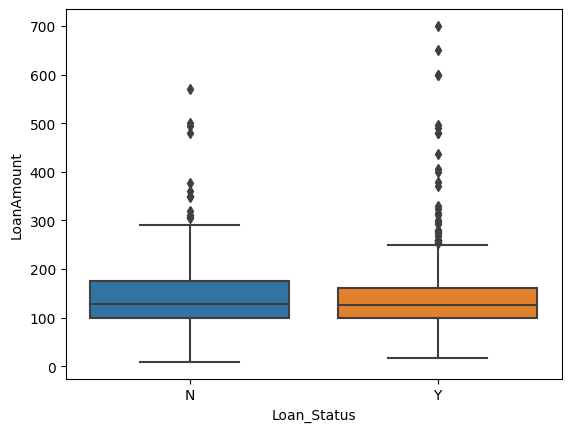

In [ ]:
# Check homogeneity of variance using box plots and Levene's test
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
statistic, p_value = stats.levene(LoanAmount_LoanST_Y,LoanAmount_LoanST_N)
print(f"Levene's test results: statistic={statistic:.2f}, p-value={p_value:.2f}")

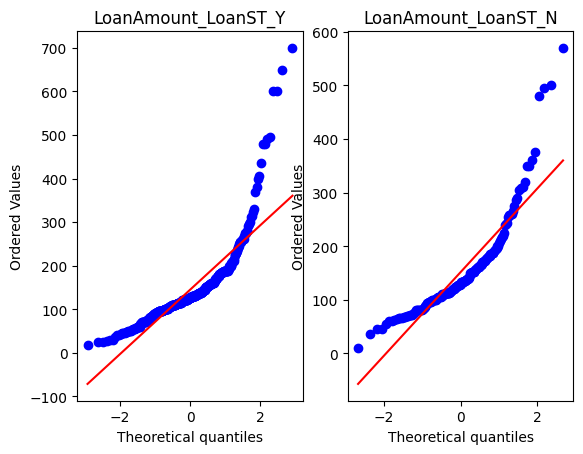

In [ ]:
# Check normality assumption using Q-Q plots
fig, ax = plt.subplots(1, 2)
stats.probplot(LoanAmount_LoanST_Y, plot=ax[0])
stats.probplot(LoanAmount_LoanST_N, plot=ax[1])

ax[0].set_title('LoanAmount_LoanST_Y')
ax[1].set_title('LoanAmount_LoanST_N')
plt.show()

In [ ]:
# Check normality assumption using Shapiro-Wilk test
shapiro_AMOUNT_Y = shapiro(LoanAmount_LoanST_Y)
shapiro_AMOUNT_N = shapiro(LoanAmount_LoanST_N)

# Print the results
print('Shapiro-Wilk test results:')
print('LoanAmount_LoanST_Y:', shapiro_AMOUNT_Y)
print('LoanAmount_LoanST_N:', shapiro_AMOUNT_N)

Shapiro-Wilk test results:
LoanAmount_LoanST_Y: ShapiroResult(statistic=0.7407258152961731, pvalue=7.572148625395525e-25)
LoanAmount_LoanST_N: ShapiroResult(statistic=0.8187885284423828, pvalue=9.962810334747732e-14)


After doing some tests to check the homogeneity of variance and normality ,see the assumptions of T test or Anova test not materialized . So we will Use nonparametric tests :

In [ ]:
# Use Kruskal-Wallis H test to compare relation between LoanAmount and loan approval status
LoanAmount_LoanST_Y = df[df['Loan_Status'] == 'Y']['LoanAmount']
LoanAmount_LoanST_N = df[df['Loan_Status'] == 'N']['LoanAmount']

kruskal_test = kruskal(LoanAmount_LoanST_Y, LoanAmount_LoanST_N)
print('Kruskal-Wallis H test results:')
print('p-value:', kruskal_test.pvalue)
if kruskal_test.pvalue < 0.05:
     print("There is a significant difference in LoanAmount based on Loan_Status.")
else:
    print("There is no significant difference in LoanAmount based on Loan_Status.")

Kruskal-Wallis H test results:
p-value: 0.39506415899838043
There is no significant difference in LoanAmount based on Loan_Status.


# Applicant Type Impact: Analyze the impact of applicant type on loan approval by comparing the loan approval rate for self-employed applicants versus those who are not self-employed.

In [ ]:
# Calculate the loan approval rate for self-employed applicants
self_emp_approved = df.loc[(df['Self_Employed'] == 'Yes') & (df['Loan_Status'] == 'Y'), 'Loan_Status'].count()
self_emp_total = df.loc[df['Self_Employed'] == 'Yes', 'Loan_Status'].count()
self_emp_approval_rate = self_emp_approved / self_emp_total

# Calculate the loan approval rate for non-self-employed applicants
non_self_emp_approved = df.loc[(df['Self_Employed'] == 'No') & (df['Loan_Status'] == 'Y'), 'Loan_Status'].count()
non_self_emp_total = df.loc[df['Self_Employed'] == 'No', 'Loan_Status'].count()
non_self_emp_approval_rate = non_self_emp_approved / non_self_emp_total

print(f'Self-employed approval rate: {self_emp_approval_rate:.2%}')
print(f'Non-self-employed approval rate: {non_self_emp_approval_rate:.2%}')

Self-employed approval rate: 68.35%
Non-self-employed approval rate: 69.29%


# Credit History Impact: Analyze the impact of credit history on loan approval by comparing the loan approval rate for customers with good credit history (Credit_History = 1) versus those with bad credit history (Credit_History = 0)

In [ ]:
# Calculate the loan approval rate for customers with good credit history
good_credit_approved = df.loc[(df['Credit_History'] == 1) & (df['Loan_Status'] == 'Y'), 'Loan_Status'].count()
good_credit_total = df.loc[df['Credit_History'] == 1, 'Loan_Status'].count()
good_credit_approval_rate = good_credit_approved / good_credit_total

# Calculate the loan approval rate for customers with bad credit history
bad_credit_approved = df.loc[(df['Credit_History'] == 0) & (df['Loan_Status'] == 'Y'), 'Loan_Status'].count()
bad_credit_total = df.loc[df['Credit_History'] == 0, 'Loan_Status'].count()
bad_credit_approval_rate = bad_credit_approved / bad_credit_total

print(f'Good credit approval rate: {good_credit_approval_rate:.2%}')
print(f'Bad credit approval rate: {bad_credit_approval_rate:.2%}')

Good credit approval rate: 80.13%
Bad credit approval rate: 8.24%


# loan approval rate for each property area

In [ ]:
# Calculate the loan approval rate for each property area
approval_rates = df.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True).mul(100).rename('Approval_Rate').reset_index()

print(approval_rates)

  Property_Area Loan_Status  Approval_Rate
0         Rural           Y      61.849711
1         Rural           N      38.150289
2     Semiurban           Y      76.754386
3     Semiurban           N      23.245614
4         Urban           Y      67.539267
5         Urban           N      32.460733


# Analysis of ApplicantIncome column

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

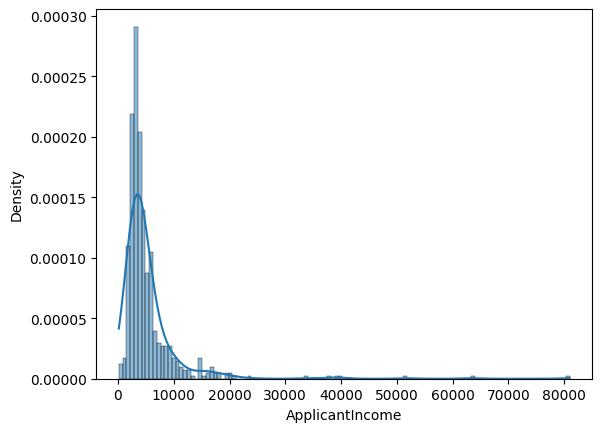

In [ ]:
#Histogram of the 'ApplicantIncome' ,help us understand the distribution and range of ApplicantIncome in our dataset
sns.histplot(df['ApplicantIncome'],kde=True,stat='density')

<Axes: xlabel='ApplicantIncome'>

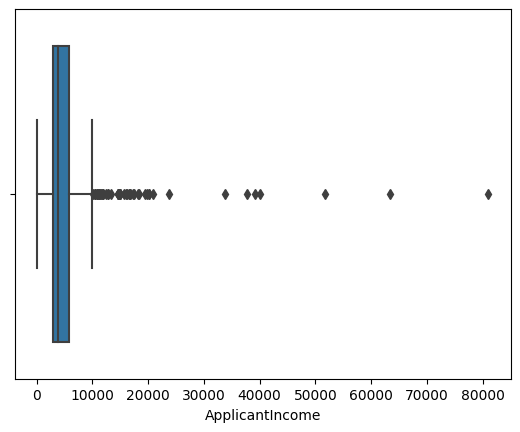

In [ ]:
# a box plot of the 'ApplicantIncome', identify the range and distribution of the ApplicantIncome
sns.boxplot(data=df, x='ApplicantIncome')

In [ ]:
df[['ApplicantIncome_log']]=np.log(df[['ApplicantIncome']])

<Axes: xlabel='ApplicantIncome_log', ylabel='Density'>

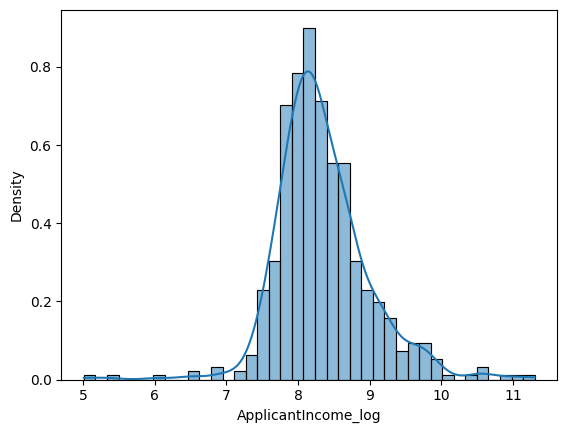

In [ ]:
#Histogram of the 'ApplicantIncome' ,help us understand the distribution and range of loan amounts in our dataset
sns.histplot(df['ApplicantIncome_log'],kde=True,stat='density')

In [ ]:
#Check normality of ApplicantIncome with Shapiro-Wilk
shapiro_ApplicantIncome= shapiro(df['ApplicantIncome_log'])
print('Shapiro-Wilk test results:')
print('ApplicantIncome:', shapiro_ApplicantIncome)

Shapiro-Wilk test results:
ApplicantIncome: ShapiroResult(statistic=0.9333208203315735, pvalue=1.3655809059701074e-15)


Because the p-value is very small(p-value<0.05) ,the ApplicantIncome NOT Normally Distributed

# INCOME Distribution: Analyze the distribution of INCOME by calculating descriptive statistics such as mean, median,and standard deviation.This can help identify the range of income levels of customers and whether there are any outliers or anomalies.

In [ ]:
# calculate descriptive statistics for ApplicantIncome
ApplicantIncome_mean = df['ApplicantIncome'].mean()
ApplicantIncome_median = df['ApplicantIncome'].median()
ApplicantIncome_std = df['ApplicantIncome'].std()

# print the results
print(f"ApplicantIncome Mean: {ApplicantIncome_mean:.2f}")
print(f"ApplicantIncome Median: {ApplicantIncome_median:.2f}")
print(f"ApplicantIncome Standard Deviation: {ApplicantIncome_std:.2f}")

ApplicantIncome Mean: 5404.30
ApplicantIncome Median: 3806.00
ApplicantIncome Standard Deviation: 6164.07


# Is there a relationship between Credit_History and ApplicantIncome?

In [ ]:
# Subset the dataset into two groups based on 'Credit_History'
applicant_income_good_credit = df[df["Credit_History"] == 1]["ApplicantIncome"]
applicant_income_poor_credit = df[df["Credit_History"] == 0]["ApplicantIncome"]

Levene's test results: statistic=0.36, p-value=0.55


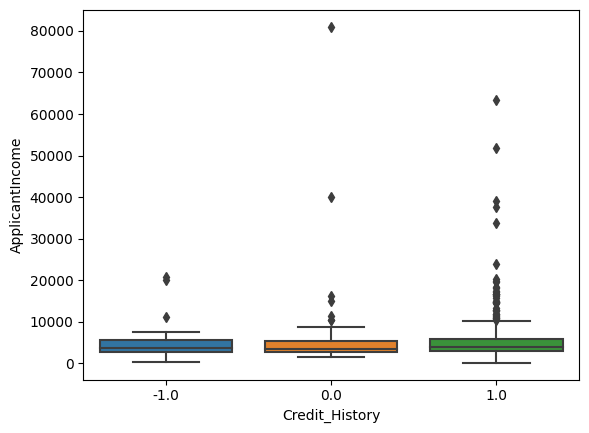

In [ ]:
# Check homogeneity of variance using box plots and Levene's test
sns.boxplot(x='Credit_History', y='ApplicantIncome', data=df)
statistic, p_value = stats.levene(applicant_income_good_credit,applicant_income_poor_credit)
print(f"Levene's test results: statistic={statistic:.2f}, p-value={p_value:.2f}")

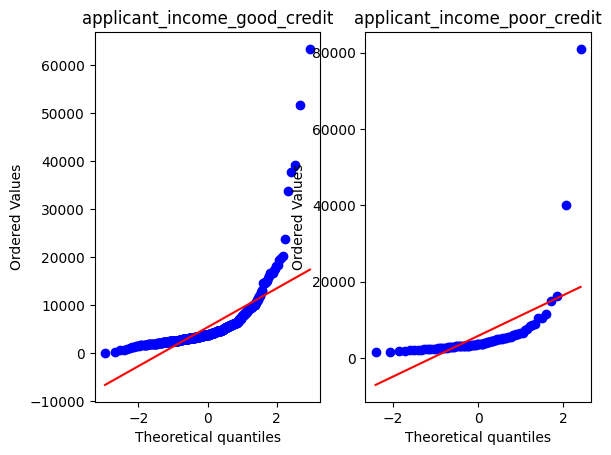

In [ ]:
# Check normality assumption using Q-Q plots
fig, ax = plt.subplots(1, 2)
stats.probplot(applicant_income_good_credit, plot=ax[0])
stats.probplot(applicant_income_poor_credit, plot=ax[1])

ax[0].set_title('applicant_income_good_credit')
ax[1].set_title('applicant_income_poor_credit')
plt.show()

In [ ]:
# Check normality assumption using Shapiro-Wilk test
shapiro_Credit_good = shapiro(applicant_income_good_credit)
shapiro_Credit_poor = shapiro(applicant_income_poor_credit)

# Print the results
print('Shapiro-Wilk test results:')
print('applicant_income_good_credit:', shapiro_Credit_good)
print('applicant_income_poor_credit:', shapiro_Credit_poor)

Shapiro-Wilk test results:
applicant_income_good_credit: ShapiroResult(statistic=0.5315676927566528, pvalue=4.333525678521612e-33)
applicant_income_poor_credit: ShapiroResult(statistic=0.32473552227020264, pvalue=6.497993402526664e-18)


After doing some tests to check the homogeneity of variance and normality ,see the assumptions of T test or Anova test not materialized . So we will Use nonparametric tests :

In [ ]:
# Use Kruskal-Wallis H test to compare relation between Credit_History and ApplicantIncome
applicant_income_good_credit = df[df["Credit_History"] == 1]["ApplicantIncome"]
applicant_income_poor_credit = df[df["Credit_History"] == 0]["ApplicantIncome"]

kruskal_test = kruskal(applicant_income_good_credit, applicant_income_poor_credit )
print('Kruskal-Wallis H test results:')
print('p-value:', kruskal_test.pvalue)
if kruskal_test.pvalue < 0.05:
     print("There is a significant difference in ApplicantIncome based on Credit_History.")
else:
    print("There is no significant difference in ApplicantIncome based on Credit_History.")


Kruskal-Wallis H test results:
p-value: 0.30881120472668955
There is no significant difference in ApplicantIncome based on Credit_History.


#  Is there a relationship between Education and ApplicantIncome?

In [ ]:
# Subset the dataset into two groups based on 'Credit_History'
applicant_income_graduate = df[df["Education"] == "Graduate"]["ApplicantIncome"]
applicant_income_not_graduate = df[df["Education"] == "Not Graduate"]["ApplicantIncome"]

Levene's test results: statistic=8.23, p-value=0.00


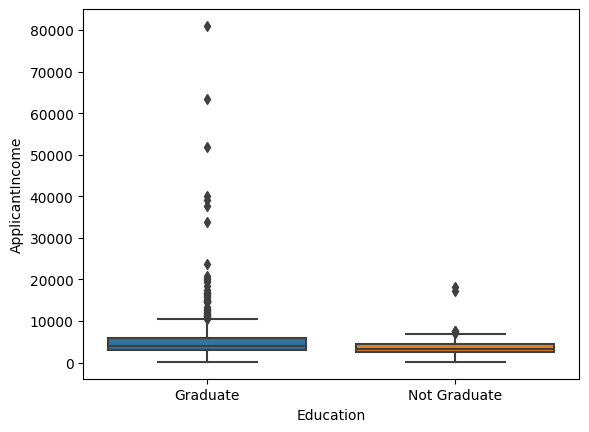

In [ ]:
#Check homogeneity of variance using box plots and Levene's test
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
statistic, p_value = stats.levene(applicant_income_graduate,applicant_income_not_graduate)
print(f"Levene's test results: statistic={statistic:.2f}, p-value={p_value:.2f}")

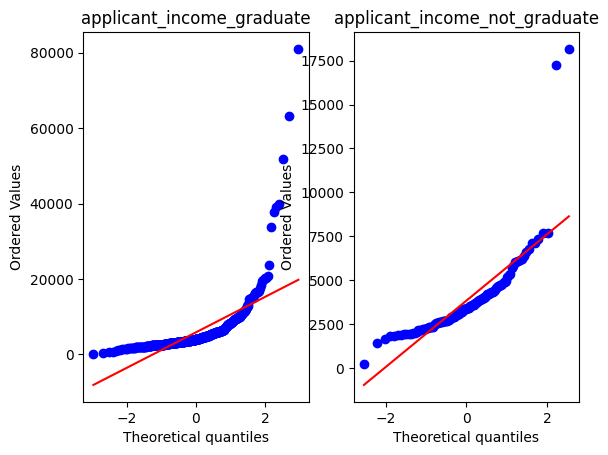

In [ ]:
# Check normality assumption using Q-Q plots
fig, ax = plt.subplots(1, 2)
stats.probplot(applicant_income_graduate, plot=ax[0])
stats.probplot(applicant_income_not_graduate, plot=ax[1])

ax[0].set_title('applicant_income_graduate')
ax[1].set_title('applicant_income_not_graduate')
plt.show()

In [ ]:
# Check normality assumption using Shapiro-Wilk test
shapiro_graduate = shapiro(applicant_income_graduate)
shapiro_not_graduate = shapiro(applicant_income_not_graduate)

# Print the results
print('Shapiro-Wilk test results:')
print('applicant_income_graduate:', shapiro_graduate)
print('applicant_income_not_graduate:', shapiro_not_graduate)

Shapiro-Wilk test results:
applicant_income_graduate: ShapiroResult(statistic=0.4800933599472046, pvalue=1.2662056657129347e-34)
applicant_income_not_graduate: ShapiroResult(statistic=0.6804474592208862, pvalue=2.9384100218261345e-15)


After doing some tests to check the homogeneity of variance and normality ,see the assumptions of T test or Anova test not materialized . So we will Use nonparametric tests :

In [ ]:
# Use Kruskal-Wallis H test to compare relation between Education and ApplicantIncome
applicant_income_graduate = df[df["Education"] == "Graduate"]["ApplicantIncome"]
applicant_income_not_graduate = df[df["Education"] == "Not Graduate"]["ApplicantIncome"]

kruskal_test = kruskal(applicant_income_graduate, applicant_income_not_graduate )
print('Kruskal-Wallis H test results:')
print('p-value:', kruskal_test.pvalue)
if kruskal_test.pvalue < 0.05:
     print("There is a significant difference in ApplicantIncome based on education.")
else:
    print("There is no significant difference in ApplicantIncome based on education.")


Kruskal-Wallis H test results:
p-value: 2.706188813121478e-05
There is a significant difference in ApplicantIncome based on education.


# Are there any notable differences in the income of each education level and how that reflected on the approval rate status?

In [ ]:
# Group the data by education level and calculate the mean and median income for each group
income_by_education = df.groupby('Education')['ApplicantIncome'].agg(['mean', 'median']).reset_index()

# Calculate the loan approval rate for each education level
approval_by_education = df.groupby('Education')['Loan_Status'].value_counts(normalize=True).mul(100).rename('Approval_Rate').reset_index()

print(income_by_education)
print(approval_by_education)

      Education         mean  median
0      Graduate  5833.369892  3988.0
1  Not Graduate  3833.314961  3365.0
      Education Loan_Status  Approval_Rate
0      Graduate           Y      71.182796
1      Graduate           N      28.817204
2  Not Graduate           Y      62.992126
3  Not Graduate           N      37.007874
